In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(123)

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.shape

(27820, 12)

In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
df = df.rename(columns = {"country-year": "country_year",
                          " gdp_for_year ($) ": "gdp_for_year",
                          "gdp_per_capita ($)": "gdp_per_capita",
                        "HDI for year": "HDI_for_year",
                         "suicides/100k pop": "suicides/100k"})

In [8]:
df.dtypes

country            object
year                int64
sex                object
age                object
suicides_no         int64
population          int64
suicides/100k     float64
country_year       object
HDI_for_year      float64
gdp_for_year       object
gdp_per_capita      int64
generation         object
dtype: object

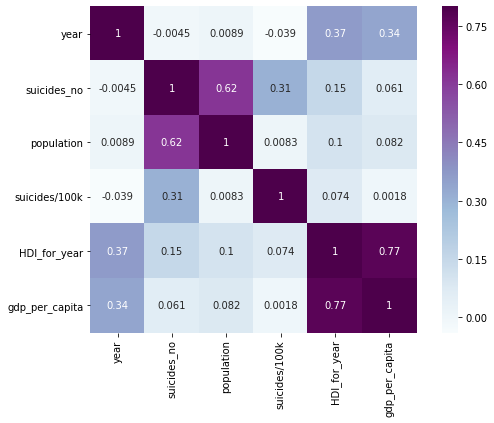

In [9]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, annot = True, square=True, cmap="BuPu");

we can think of dropping HDI_for_year as it is highly correlated and also it contain 70% of null values.

In [10]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [11]:
df = df.drop(['country_year', 'HDI_for_year'], axis = 1)

In [12]:
df.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [13]:
df.age.value_counts()

55-74 years    4642
15-24 years    4642
35-54 years    4642
25-34 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [14]:
df.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [15]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

# Univariate Analysis

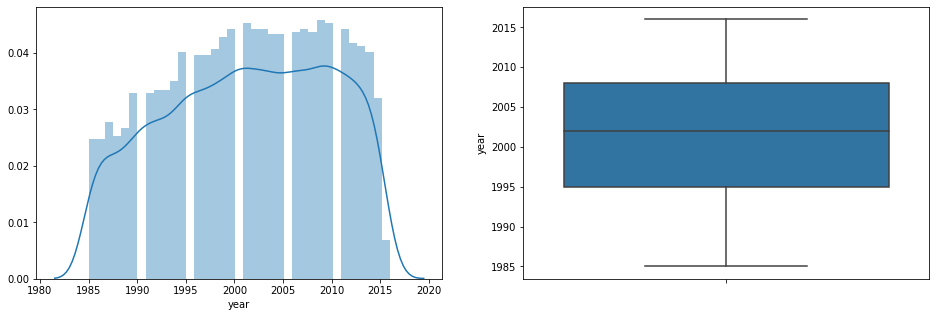

In [16]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['year'])

plt.subplot(122)
sns.boxplot(y="year", data = df)

plt.show()

As we can see the year plot, we can make bins for this field.

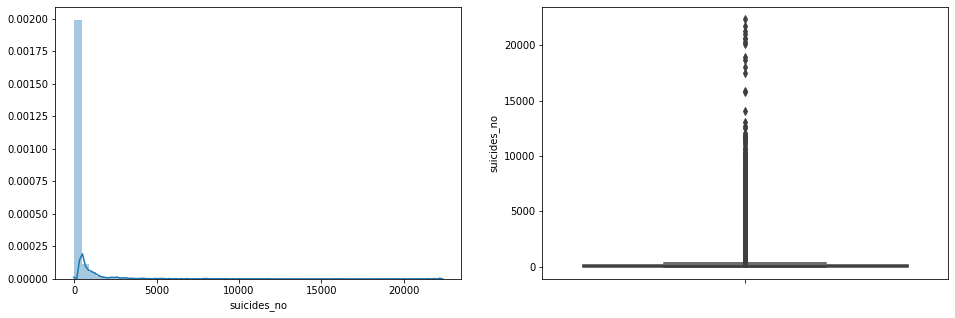

In [17]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['suicides_no'])

plt.subplot(122)
sns.boxplot(y="suicides_no", data = df)

plt.show()

In suicides_no we can see that there is skewness and approx 80% values are in 0 and 5000

In [18]:
#Finding Percentiles for suicides_no
for i in range(0,100,10):
    var = df["suicides_no"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 1
30 percentile value is 4
40 percentile value is 11
50 percentile value is 25
60 percentile value is 49
70 percentile value is 95
80 percentile value is 190
90 percentile value is 496
100 percentile value is  22338


In [19]:
#Finding Percentiles for suicides_no
for i in range(90,100):
    var = df["suicides_no"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 496
91 percentile value is 564
92 percentile value is 644
93 percentile value is 745
94 percentile value is 893
95 percentile value is 1051
96 percentile value is 1257
97 percentile value is 1579
98 percentile value is 2429
99 percentile value is 3995
100 percentile value is  22338


As we can see after 99th percentile there is outlier.

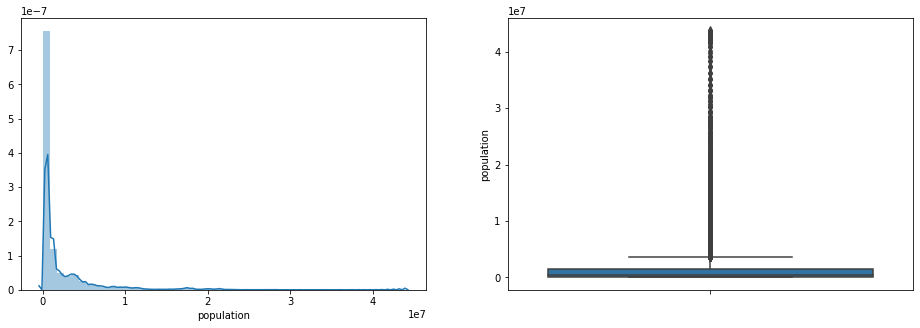

In [20]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['population'])

plt.subplot(122)
sns.boxplot(y="population", data = df)

plt.show()

In population there is skewness and there some outliers also.

In [21]:
#Finding Percentiles for suicides_no
for i in range(0,100,10):
    var = df["population"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 278
10 percentile value is 17304
20 percentile value is 56100
30 percentile value is 170115
40 percentile value is 293384
50 percentile value is 430200
60 percentile value is 646500
70 percentile value is 1155762
80 percentile value is 2367792
90 percentile value is 4960889
100 percentile value is  43805214


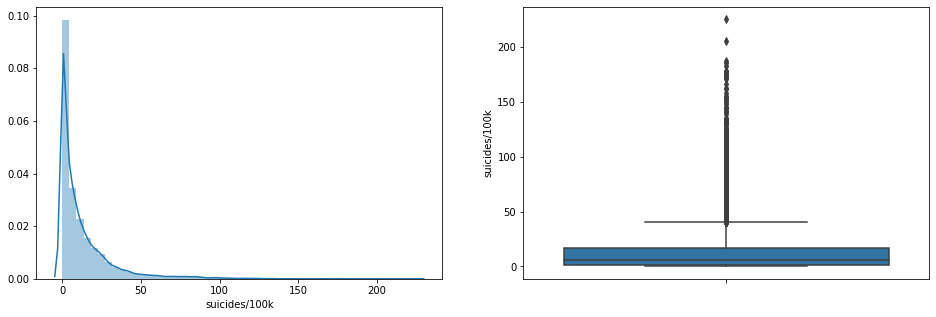

In [22]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['suicides/100k'])

plt.subplot(122)
sns.boxplot(y="suicides/100k", data = df)

plt.show()

In suicides/100k, there is skewness and outliers.

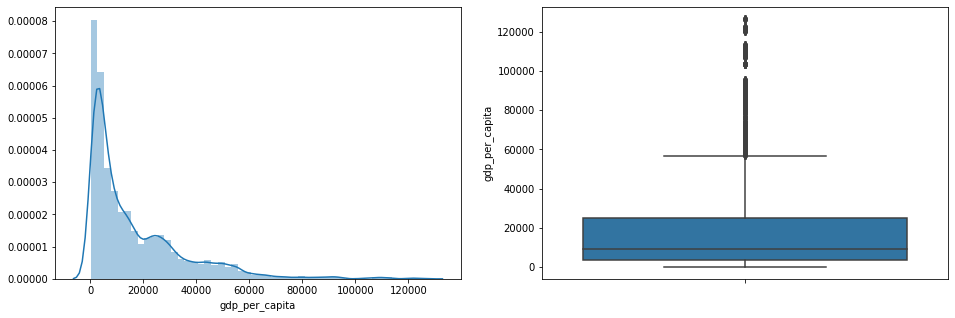

In [23]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(df['gdp_per_capita'])

plt.subplot(122)
sns.boxplot(y="gdp_per_capita", data = df)

plt.show()

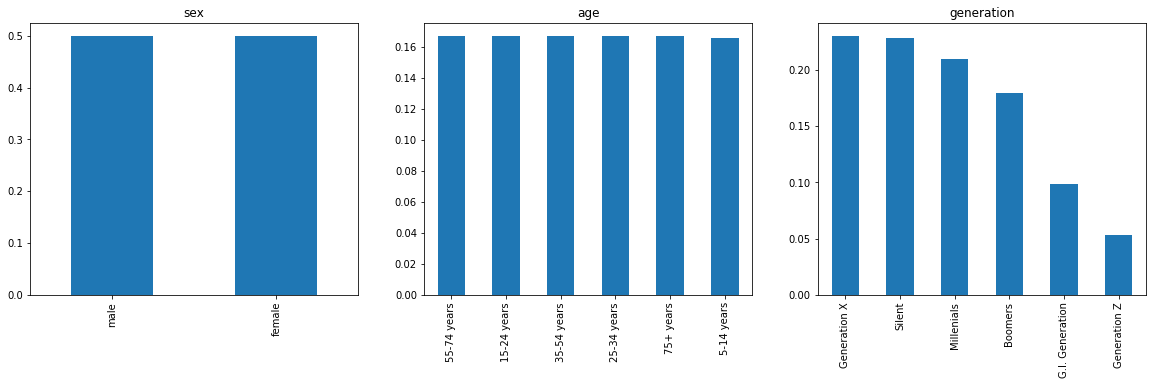

In [24]:
plt.figure(1)
plt.subplot(131)
df['sex'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'sex')

plt.subplot(132)
df['age'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'age')

plt.subplot(133)
df['generation'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'generation')

# BiVariate Analysis

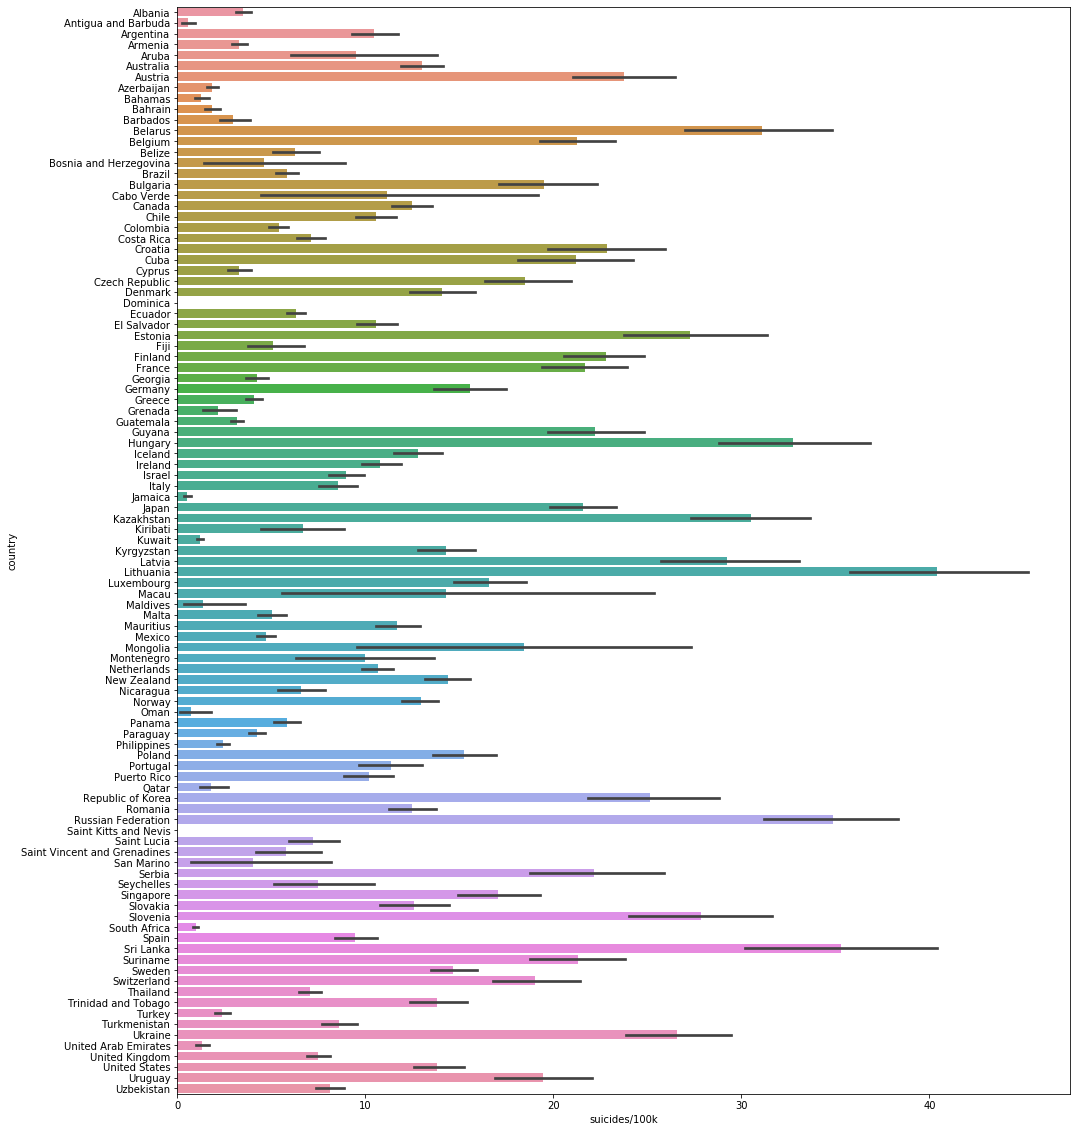

In [25]:
plt.figure(1, figsize=(16,20))
sns.barplot(x='suicides/100k', y='country', data=df)

plt.show()

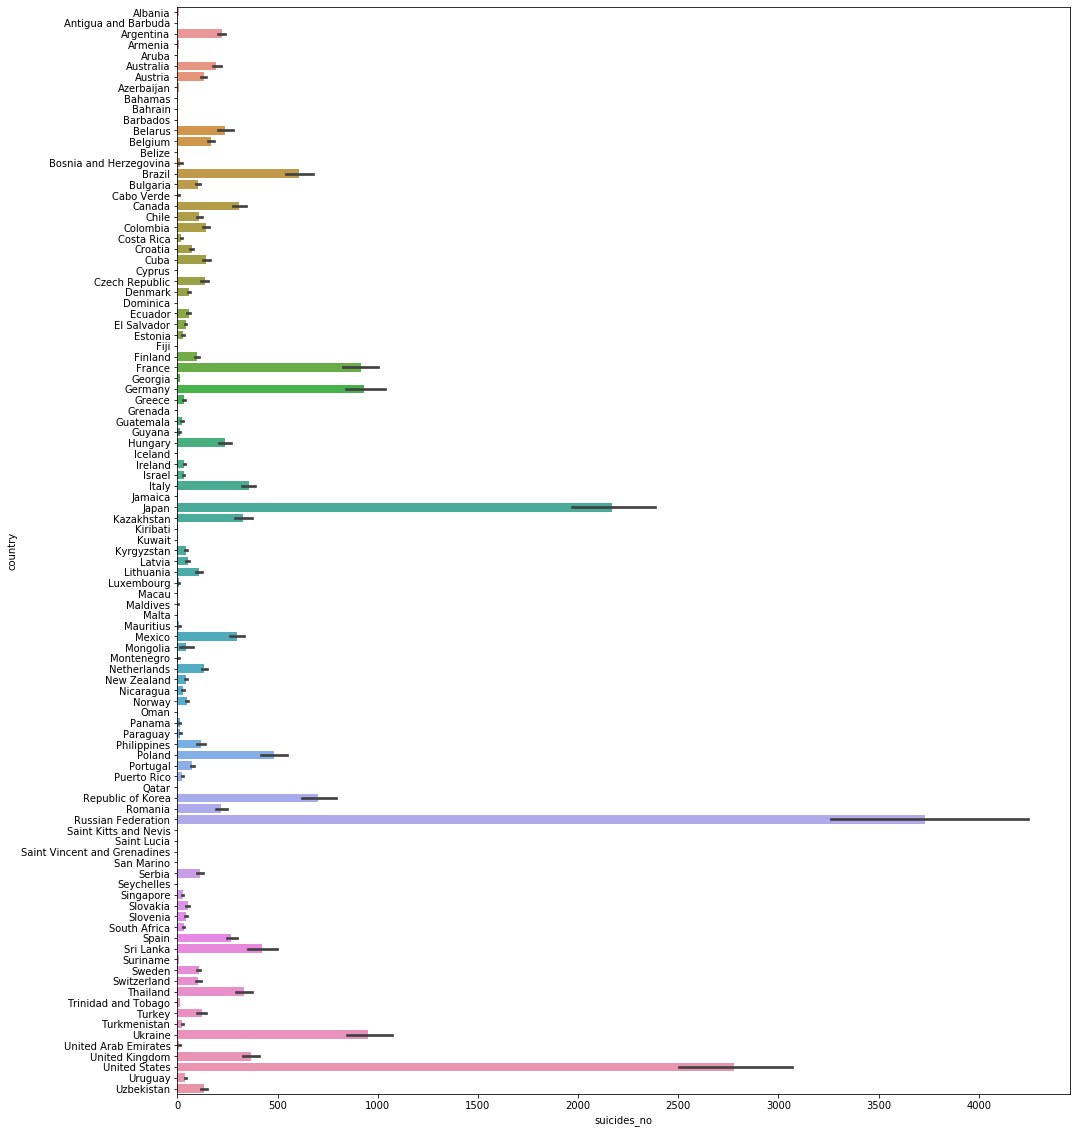

In [40]:
plt.figure(1, figsize=(16,20))
sns.barplot(x='suicides_no', y='country', data=df)

plt.show()

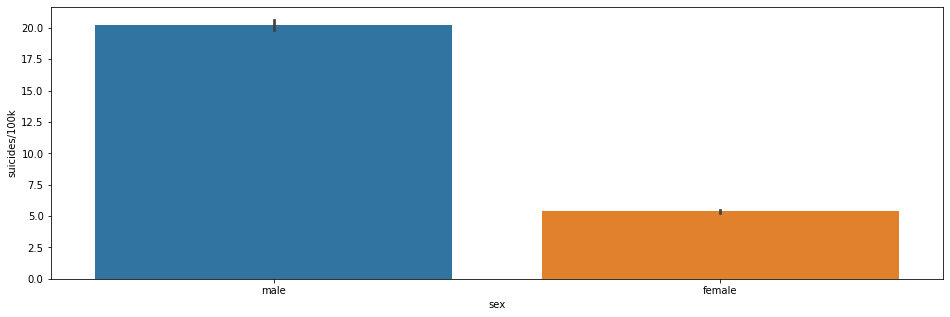

In [27]:
plt.figure(1, figsize=(16,5))
sns.barplot(x='sex', y='suicides/100k', data=df)

plt.show()

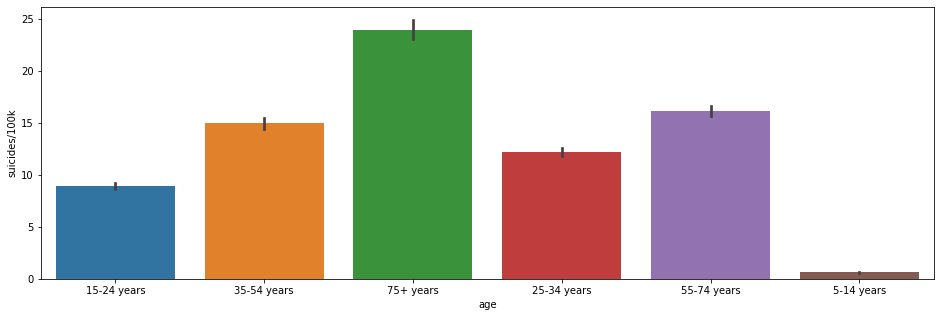

In [28]:
plt.figure(1, figsize=(16,5))
sns.barplot(x='age', y='suicides/100k', data=df)

plt.show()

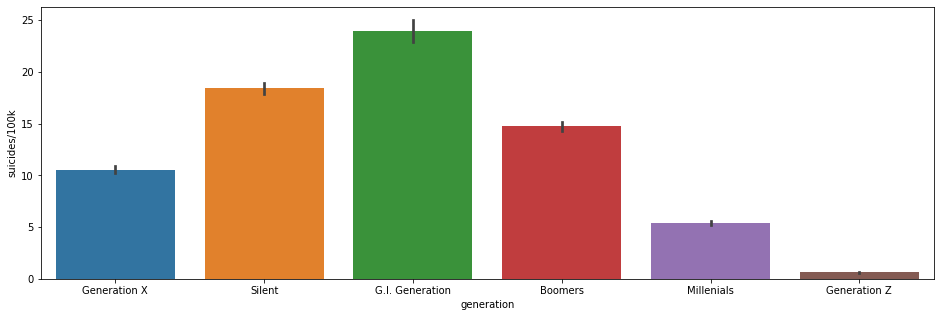

In [29]:
plt.figure(1, figsize=(16,5))
sns.barplot(x='generation', y='suicides/100k', data=df)

plt.show()

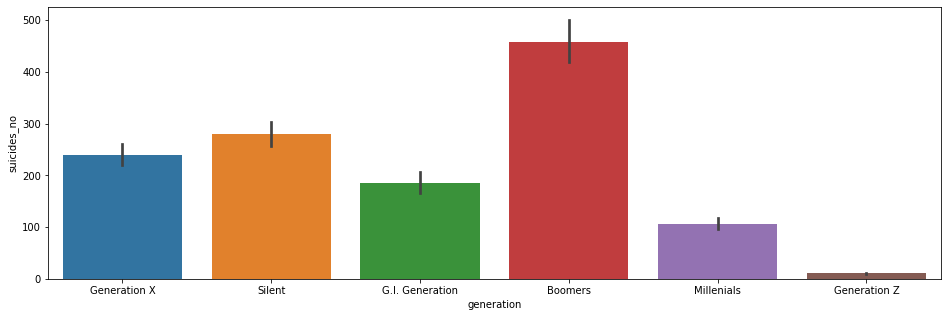

In [30]:
plt.figure(1, figsize=(16,5))
sns.barplot(x='generation', y='suicides_no', data=df)

plt.show()

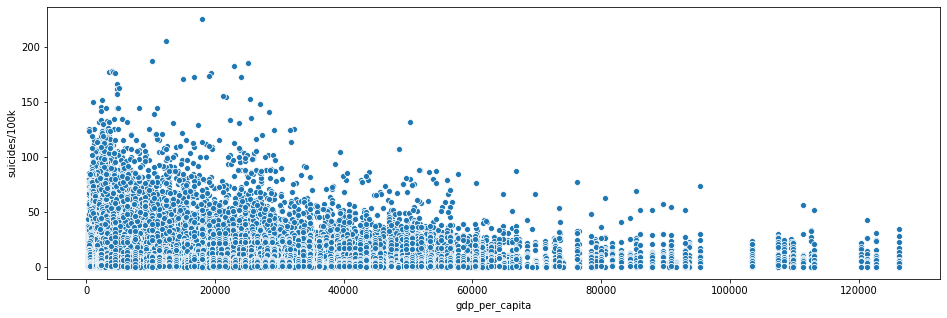

In [31]:
plt.figure(1, figsize=(16,5))
sns.scatterplot(x='gdp_per_capita', y='suicides/100k', data=df)

plt.show()

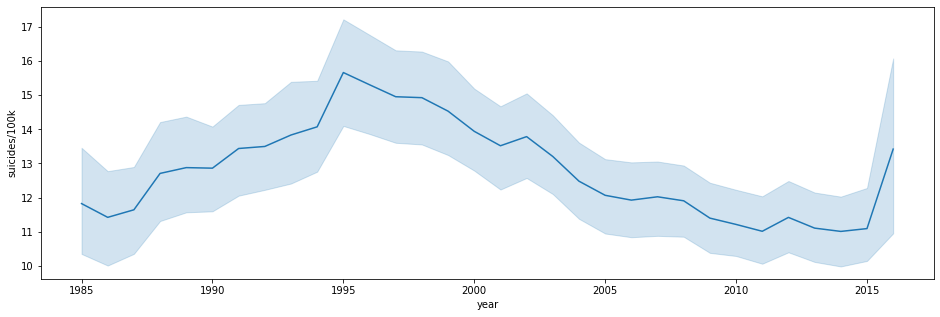

In [32]:
plt.figure(1, figsize=(16,5))
sns.lineplot(x='year', y='suicides/100k', data=df)

plt.show()

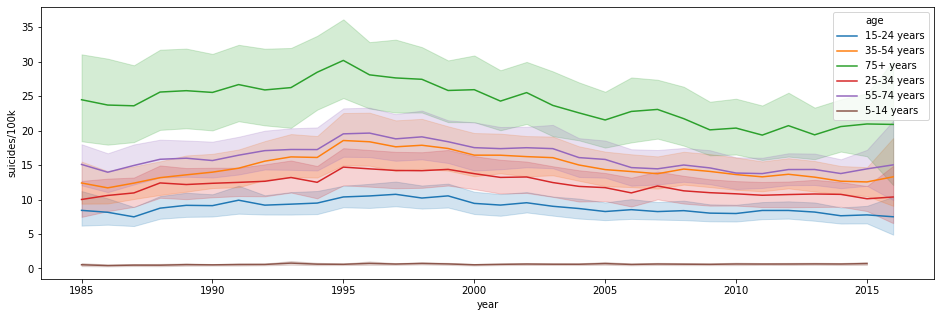

In [60]:
plt.figure(1, figsize=(16,5))
sns.lineplot(x='year', y='suicides/100k',hue='age', data=df)

plt.show()

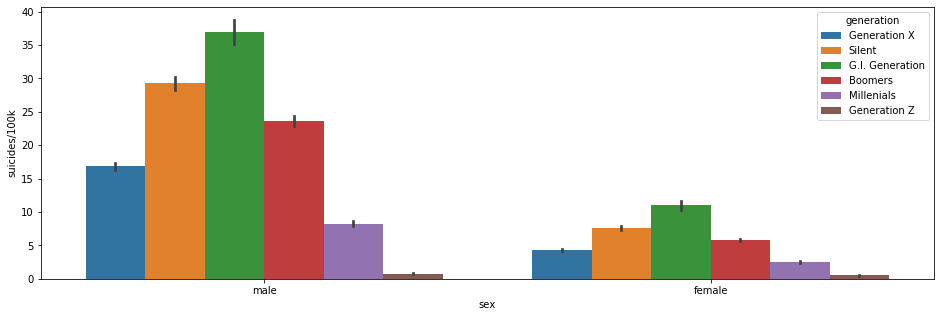

In [33]:
plt.figure(1, figsize=(16,5))
sns.barplot(x='sex', y='suicides/100k', hue='generation', data=df)

plt.show()

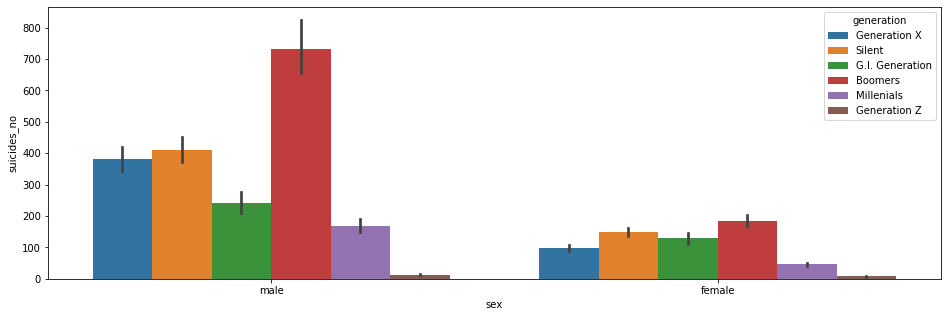

In [34]:
plt.figure(1, figsize=(16,5))
sns.barplot(x='sex', y='suicides_no', hue='generation', data=df)

plt.show()

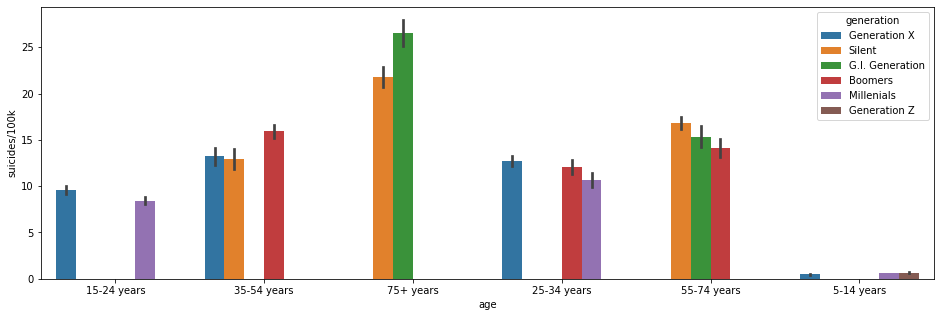

In [35]:
plt.figure(1, figsize=(16,5))
sns.barplot(x='age', y='suicides/100k', hue='generation', data=df) 

plt.show()

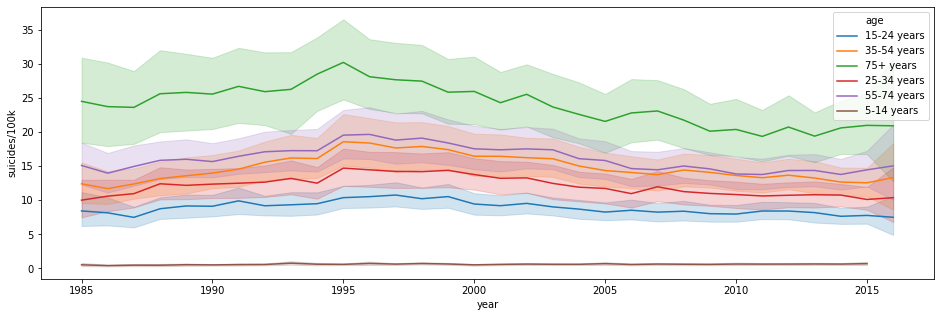

In [36]:
plt.figure(1, figsize=(16,5))
sns.lineplot(x='year', y='suicides/100k',hue='age', data=df)

plt.show()

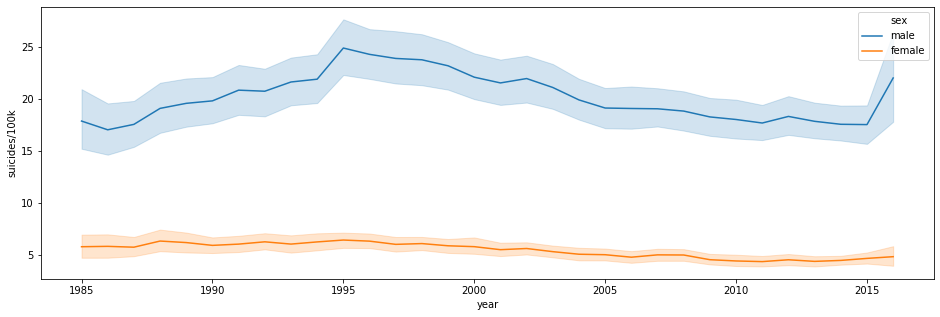

In [37]:
plt.figure(1, figsize=(16,5))
sns.lineplot(x='year', y='suicides/100k',hue='sex', data=df)

plt.show()

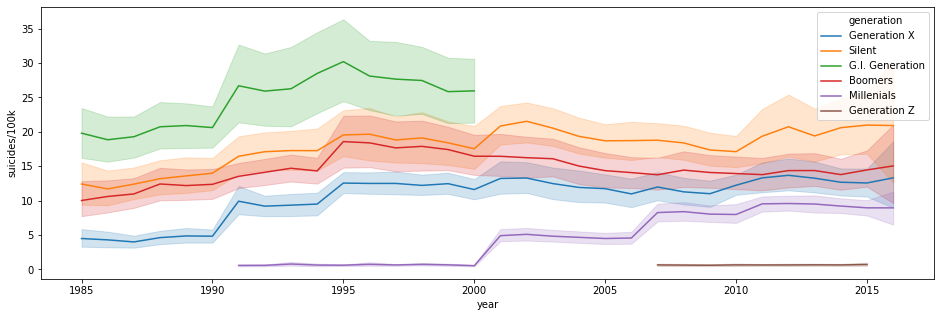

In [38]:
plt.figure(1, figsize=(16,5))
sns.lineplot(x='year', y='suicides/100k',hue='generation', data=df)

plt.show()